In [1]:
# Import 
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
PATH = "data/"

In [3]:
!ls {PATH}

city_data.csv   city_list.csv   global_data.csv results.csv


In [4]:
data = pd.read_csv(f'{PATH}results.csv', low_memory=False)

In [5]:
data.head()

,year,gavt,cavt
0,1750,8.72,10.07
1,1751,7.98,10.79
2,1752,5.78,2.81
3,1753,8.39,9.52
4,1754,8.47,9.88


In [6]:
data.describe()

,year,gavt,cavt
count,264.000000,264.000000,263.000000
mean,1881.500000,8.359394,9.486882
std,76.354437,0.575184,1.099282
min,1750.000000,5.780000,0.250000
25%,1815.750000,8.077500,9.070000
50%,1881.500000,8.365000,9.550000
75%,1947.250000,8.700000,10.025000
max,2013.000000,9.730000,12.160000


In [7]:
# Checking is there any null values exist in dataset or missing in dataset
data.isnull().values.any()

True

In [8]:
# Checking how many missing values exist in the collection
data.isnull().sum()

year    0
gavt    0
cavt    1
dtype: int64

In [9]:
# total summation of all missing values in the DataFrame
data.isnull().sum().sum()

1

In [10]:
# Replacing null values using mean
cavt_mean = data['cavt'].mean()
data['cavt'].fillna(cavt_mean, inplace = True)

In [11]:
# Calculate a 10 year moving average and add it to your existing dataframe as a new column named 'MA10'.
ma4global = data['gavt'].rolling(window=10).mean()
ma4city = data['cavt'].rolling(window=10).mean()

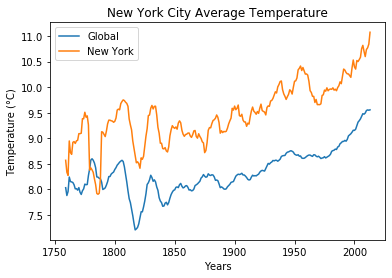

In [12]:
#Local Data is as same as New York
plt.plot(data['year'],ma4global,label='Global')
plt.plot(data['year'],ma4city,label='New York')
plt.legend()
plt.xlabel("Years")
plt.ylabel("Temperature (°C)") 
plt.title("New York City Average Temperature")
plt.show()

In [16]:
# Correlation coefficient of New York
np.corrcoef(data.iloc[:,0], data.cavt)

array([[1.       , 0.4810213],
       [0.4810213, 1.       ]])

In [17]:
# Correlation coefficient of Global Average Temperature
np.corrcoef(data.iloc[:,0], data.gavt)

array([[1.        , 0.61211478],
       [0.61211478, 1.        ]])